In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats


cars = pd.read_csv('Cars93.csv')

In [3]:
#Checking Correlations
#Before we run a linear regression, we should check for correlation between variables. Using pandas, we can call corr() to generate a correlation matrix on these fields.

#Here is our code:
cars[['Weight','MPG.highway']].corr()
#Notice that the correlation coefficient between these fields comes back as -0.810658. This is a strong negative correlation. With a strong correlation, let's proceed with exploring linear regression.

,Weight,MPG.highway
Weight,1.000000,-0.810658
MPG.highway,-0.810658,1.000000


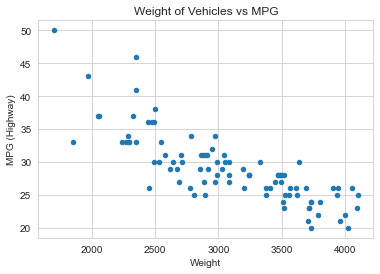

In [4]:
sns.set_style('whitegrid')

ax = cars.plot(title = 'Weight of Vehicles vs MPG', kind='scatter', x='Weight',y='MPG.highway')
ax.set_xlabel('Weight')
ax.set_ylabel('MPG (Highway)')
plt.show()

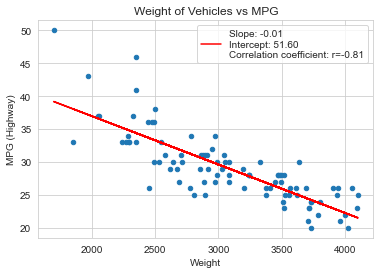

In [5]:
#Calculating the linear regression line

ax = cars.plot(title = 'Weight of Vehicles vs MPG', kind='scatter', x='Weight',y='MPG.highway')
ax.set_xlabel('Weight')
ax.set_ylabel('MPG (Highway)')
x = cars['Weight'].to_numpy()
y = cars['MPG.highway'].to_numpy()

# Call scipy.stats.linregress(x,y) to calculate the linear regression between weight and MPG highway. 
# Note that this allows us to catch the results in the following variables:
# slope - the slant of the trend line - m
# intercept - where the line crosses the y-axis when x=0 - b
# r - correlation coefficient
# p - p-value for a hypothesis test whose null test is a slope of 0
# stderr - standard error

slope, intercept, r, p, stderr = scipy.stats.linregress(x,y)
line = f'Slope: {slope:.2f}\nIntercept: {intercept:.2f}\nCorrelation coefficient: r={r:.2f}'
ax.plot(x, intercept + slope * x, label=line, color='red')
ax.legend(facecolor='white')
plt.show()

Multiple Linear Regression

In [6]:
import sklearn
from sklearn.model_selection import train_test_split

In [7]:
cars.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [8]:
cars.describe()

,Unnamed: 0,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,91.000000,82.000000,93.000000
mean,47.000000,17.125806,19.509677,21.898925,22.365591,29.086022,2.667742,143.827957,5280.645161,2332.204301,16.664516,5.086022,183.204301,103.946237,69.376344,38.956989,27.829670,13.890244,3072.903226
std,26.990739,8.746029,9.659430,11.030457,5.619812,5.331726,1.037363,52.374410,596.731690,496.506525,3.279370,1.038979,14.602382,6.819674,3.778986,3.223265,2.989072,2.997967,589.896510
min,1.000000,6.700000,7.400000,7.900000,15.000000,20.000000,1.000000,55.000000,3800.000000,1320.000000,9.200000,2.000000,141.000000,90.000000,60.000000,32.000000,19.000000,6.000000,1695.000000
25%,24.000000,10.800000,12.200000,14.700000,18.000000,26.000000,1.800000,103.000000,4800.000000,1985.000000,14.500000,4.000000,174.000000,98.000000,67.000000,37.000000,26.000000,12.000000,2620.000000
50%,47.000000,14.700000,17.700000,19.600000,21.000000,28.000000,2.400000,140.000000,5200.000000,2340.000000,16.400000,5.000000,183.000000,103.000000,69.000000,39.000000,27.500000,14.000000,3040.000000
75%,70.000000,20.300000,23.300000,25.300000,25.000000,31.000000,3.300000,170.000000,5750.000000,2565.000000,18.800000,6.000000,192.000000,110.000000,72.000000,41.000000,30.000000,15.000000,3525.000000
max,93.000000,45.400000,61.900000,80.000000,46.000000,50.000000,5.700000,300.000000,6500.000000,3755.000000,27.000000,8.000000,219.000000,119.000000,78.000000,45.000000,36.000000,22.000000,4105.000000


In [9]:
# Clean the data and remove missing values. 
# The make column has info in other places. so it's dropped.
cars.drop(columns='Make', inplace=True)
# Drop any column that is not categorical or numeric. 
cars.drop(columns='Unnamed: 0', inplace=True)
cars["Manufacturer"].replace('Chrylser',"Chrysler",inplace=True)
#I remember this issue with the data set. can also run unique() on every column


In [10]:
#Check for outliers.
#mean +/- 3 standard deviations
#for loop going through each column. if 3 std more or les than mean.
#inspo: https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe?noredirect=1&lq=1
def outlier(input, mean, std):
    if ((mean + 3*std) < input) or ((mean - 3*std)> input):
        return [True, input]
    else:
        return [False, input]


 #go through each column in the list, if in that column, the value is an outlier, append it to the list. if not, move   
for x in list(cars.columns):
    try:
        outlier_list = []
        print(x)
        for y in cars[x]:
            if outlier(y,cars[x].mean(),cars[x].std())[0]:
                outlier_list.append(outlier(y,cars[x].mean(),cars[x].std())[1])
        print(outlier_list)
    except:
        continue

Manufacturer
Model
Type
Min.Price
[45.4, 43.8]
Price
[61.9]
Max.Price
[80.0]
MPG.city
[46, 42]
MPG.highway
[50, 46]
AirBags
DriveTrain
Cylinders
EngineSize
[]
Horsepower
[]
RPM
[]
Rev.per.mile
[]
Man.trans.avail
Fuel.tank.capacity
[27.0]
Passengers
[]
Length
[]
Wheelbase
[]
Width
[]
Turn.circle
[]
Rear.seat.room
[]
Luggage.room
[]
Weight
[]
Origin


In [11]:
#test each column
cars['Luggage.room'].isna().value_counts()


False    82
True     11
Name: Luggage.room, dtype: int64

In [12]:
#Luggage and rear seat room are numeric columns with null values. 
# Will fill with mean! If it was categorical, I'd fill with mode / most-frequent
from sklearn.impute import SimpleImputer
mean_imp = SimpleImputer(missing_values=np.nan,strategy='mean')

cars['Rear.seat.room'] = mean_imp.fit_transform(cars['Rear.seat.room'].values.reshape(-1,1))
cars['Luggage.room'] = mean_imp.fit_transform(cars['Luggage.room'].values.reshape(-1,1))

In [13]:
# Let our target variable be MPG.highway again. 
# Separate the independent variables from the dependent variable.
Y = cars["MPG.highway"]

In [14]:
# Generate dummy variables for the categorical features.
cars = pd.get_dummies(cars, prefix='', prefix_sep='', columns=["Manufacturer", "Model", "Type", "AirBags", "DriveTrain", "Cylinders", "Man.trans.avail", "Origin"], drop_first=True)
#need to drop one level of each feature to end up with k-1 dummies, like lesson says

In [15]:
#Create a training set that's 75% of your data set and a complementary test set with the remaining 25%. Specify random_state=0.
X = cars.drop("MPG.highway", axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.25,random_state=0)

In [16]:
X  #just checking. has dummies!

,Min.Price,Price,Max.Price,MPG.city,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,...,None,Front,Rear,4,5,6,8,rotary,Yes,non-USA
0,12.9,15.9,18.8,25,1.8,140,6300,2890,13.2,5,...,1,1,0,1,0,0,0,0,1,1
1,29.2,33.9,38.7,18,3.2,200,5500,2335,18.0,5,...,0,1,0,0,0,1,0,0,1,1
2,25.9,29.1,32.3,20,2.8,172,5500,2280,16.9,5,...,0,1,0,0,0,1,0,0,1,1
3,30.8,37.7,44.6,19,2.8,172,5500,2535,21.1,6,...,0,1,0,0,0,1,0,0,1,1
4,23.7,30.0,36.2,22,3.5,208,5700,2545,21.1,4,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,16.6,19.7,22.7,17,2.5,109,4500,2915,21.1,7,...,1,1,0,0,1,0,0,0,1,1
89,17.6,20.0,22.4,21,2.0,134,5800,2685,18.5,5,...,1,1,0,1,0,0,0,0,1,1
90,22.9,23.3,23.7,18,2.8,178,5800,2385,18.5,4,...,1,1,0,0,0,1,0,0,1,1
91,21.8,22.7,23.5,21,2.3,114,5400,2215,15.8,5,...,0,0,1,1,0,0,0,0,1,1


In [17]:
#Train the model using the LinearRegression class. Leave all parameters at their default values.
reg = sklearn.linear_model.LinearRegression().fit(X_train, Y_train)

In [18]:
#Use your model to generate predictions on the test set
predictions = reg.predict(X_test)

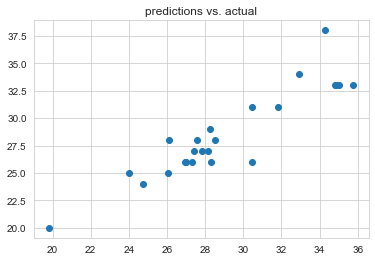

In [19]:
# then create two scatter plots: one with predicted values against actual values, 


plt.scatter(predictions, Y_test)
plt.title('predictions vs. actual')
#add pretty title and axis
plt.show()

#IT WORKED

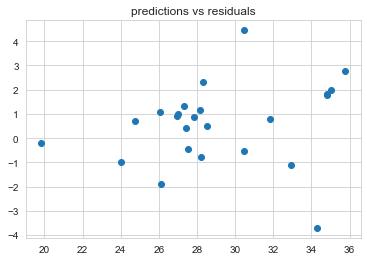

In [20]:
# and another with residuals against predicted values. 
#lesson says: Residuals are the differences between the observed values and predicted values
#so predictions minus observed aka y test???
plt.scatter(predictions, predictions-Y_test)
plt.title('predictions vs residuals')
#pretty title and label
plt.show()

#hmmmmm. Weird. Not sure if it's meant to be like this. But they are residuals.

In [21]:
# Print the coefficient of determination of the model with the .score() method
reg.score(X_test,Y_test)


0.8039607421804011

In [22]:
reg.score(X_train, Y_train)

1.0

In [24]:
#Print out the actual model in equation form, i.e., y = b + c1x1 + c2x2 + c3x3 + ....

#no direction on this in the lesson or attached links. moving on from this.

X_string = ''
count = 0

for i, coef in enumerate(reg.coef_):
    X_string += f"({round(coef,3)} X{i}+\n"
equation = f'Out Equation is y= {reg.intercept_} +{X_string}'
print(equation)




Out Equation is y= 8.202696417788903 +(0.04 X0+
(-0.143 X1+
(0.085 X2+
(0.829 X3+
(0.561 X4+
(-0.009 X5+
(0.001 X6+
(-0.0 X7+
(-0.121 X8+
(-0.636 X9+
(0.055 X10+
(0.009 X11+
(0.039 X12+
(-0.084 X13+
(-0.142 X14+
(0.142 X15+
(-0.001 X16+
(0.328 X17+
(0.887 X18+
(0.873 X19+
(0.813 X20+
(0.731 X21+
(-0.905 X22+
(-0.635 X23+
(-1.055 X24+
(-0.687 X25+
(0.547 X26+
(-0.013 X27+
(0.061 X28+
(-0.406 X29+
(-0.753 X30+
(0.48 X31+
(1.167 X32+
(0.484 X33+
(-0.225 X34+
(-0.407 X35+
(-0.661 X36+
(-0.253 X37+
(0.366 X38+
(0.721 X39+
(-0.0 X40+
(-0.0 X41+
(-0.532 X42+
(-0.193 X43+
(-0.11 X44+
(0.724 X45+
(-0.163 X46+
(1.54 X47+
(-0.163 X48+
(-1.057 X49+
(0.171 X50+
(0.887 X51+
(0.17 X52+
(0.0 X53+
(-0.0 X54+
(0.0 X55+
(-0.0 X56+
(-0.563 X57+
(0.879 X58+
(-0.277 X59+
(-0.0 X60+
(0.555 X61+
(-0.0 X62+
(-0.232 X63+
(-0.0 X64+
(-0.693 X65+
(-0.689 X66+
(2.063 X67+
(0.292 X68+
(0.873 X69+
(-0.545 X70+
(0.0 X71+
(0.219 X72+
(0.48 X73+
(-0.365 X74+
(0.445 X75+
(0.021 X76+
(-0.225 X77+
(0.121 X78+
(0.0 X79+
(-